<a href="https://colab.research.google.com/github/AlecTraas/computational-geo-lab/blob/main/Colab/Kai/dijkstra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
import networkx as nx

In [78]:
def edge(i):
  return list(list(G.edges())[i])

In [13]:
def get_edge_w(t):
  return G[t[0]][t[1]]['weight']

In [3]:
def draw_edge(t,c):
    nx.draw_networkx_edges(G, pos, edgelist=[t], edge_color=c)

In [76]:
def path_gen(G, sp, ep):
    weighted_edges = [(i, get_edge_w(e)) for i, e in enumerate(G.edges()) if sp in e]
    ei,ew = min(weighted_edges, key=lambda x: x[1]) # tuple (global edge index, weight)
    while edge(ei)[1] != ep:
      pass

In [80]:
np.random.seed(37)
num = 10
points = np.random.rand(num, 2)

tri = Delaunay(points)

point_weights = {i: 1024 for i in range(len(points))}

edge_weights = {}
for simplex in tri.simplices:
    for i in range(3):
        for j in range(i+1, 3):
            edge = tuple(sorted([simplex[i], simplex[j]]))
            if edge not in edge_weights:
                edge_weights[edge] = (int)(np.random.rand()*2000)/100

G = nx.Graph()
for edge, weight in edge_weights.items():
    G.add_edge(edge[0], edge[1], weight=weight)

# generate the optimal path from 3 to 5
path_edges = path_gen(G,3,5)

TypeError: 'tuple' object is not callable

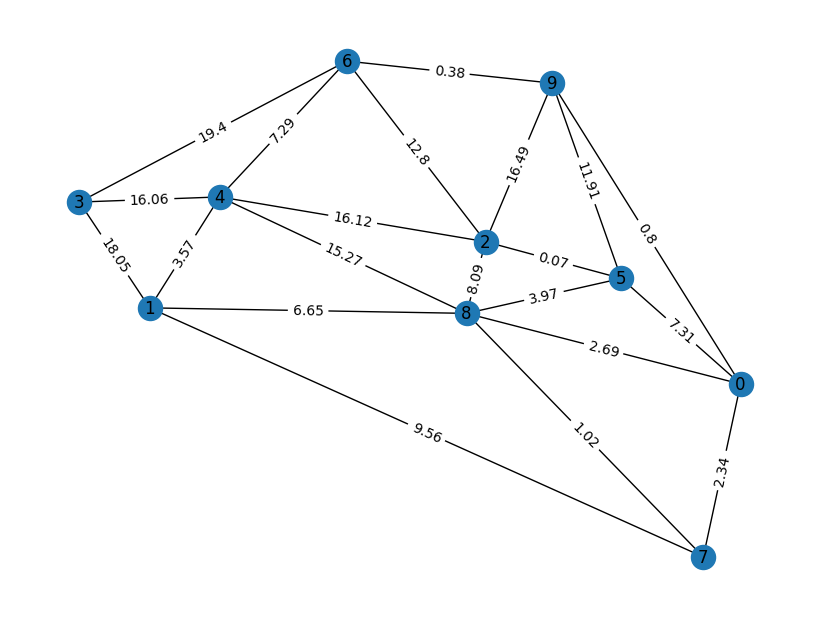

In [48]:
plt.figure(figsize=(8, 6))
pos = {i: points[i] for i in range(len(points))}
nx.draw(G, pos, with_labels=True, node_size=300)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})
plt.show()